In [16]:
# file_name="../../../../OneDrive - Western Michigan University/machine learning/project/datasets/"+"/combined_OR_Style.csv"
path="/home/edwinjose/Downloads/datasets/"
import pandas as pd
import os

In [17]:
# compbine csvs in a folder
df_combined=pd.DataFrame()
for file in os.listdir(path):
    if file.endswith(".csv"):
        file_name=path+file
        print(file_name)
        df=pd.read_csv(path+file,low_memory=False,usecols=['State', 'Vehicle Make', 'Vehicle Model'])
        df_combined=pd.concat([df_combined,df],ignore_index=True)

/home/edwinjose/Downloads/datasets/combined_OR_Style.csv
/home/edwinjose/Downloads/datasets/wa_fl_registrations_public_cleaned.csv
/home/edwinjose/Downloads/datasets/ca_ev_registrations_public_cleaned.csv
/home/edwinjose/Downloads/datasets/wi_va_registrations_public_cleaned.csv
/home/edwinjose/Downloads/datasets/wa_va_registrations_public_cleaned.csv
/home/edwinjose/Downloads/datasets/wa_ev_registrations_public_cleaned.csv


In [18]:
df_combined.to_csv("/home/edwinjose/Downloads/combined_DataCleaned.csv",index=False)

In [19]:
df_combined.columns

Index(['State', 'Vehicle Make', 'Vehicle Model'], dtype='object')

In [24]:
df_combined.to_pickle("/home/edwinjose/Downloads/combined_DataCleaned.pkl")

In [29]:
df_state=df_combined["State"].value_counts().rename_axis('State').reset_index(name='counts')
df_state.to_pickle("../df_state.pkl")

In [30]:
df_state=pd.read_pickle('../df_state.pkl')

In [31]:
df_state.head()

,State,counts
0,WA,5296698
1,NY,3544989
2,CA,2542443
3,TX,1756750
4,CO,1397577


In [32]:
df_VehicleMake=df_combined["Vehicle Make"].value_counts().rename_axis('State').reset_index(name='counts')
df_VehicleMake.to_pickle("../df_VehicleMake.pkl")
df_VehicleMake.head()

,State,counts
0,TESLA,5379866
1,CHEVROLET,1916828
2,NISSAN,1635973
3,TOYOTA,1353150
4,FORD,1111147


In [34]:
# df_combined.groupby(['State','Vehicle Make']).size().reset_index(name='counts')
df_state_VehicleMake=df_combined.groupby(['State','Vehicle Make']).size().reset_index(name='counts')
df_state_VehicleMake.to_pickle("../df_state_VehicleMake.pkl")
df_state_VehicleMake.head()

,State,Vehicle Make,counts
0,CA,AUDI,30004
1,CA,BENTLEY,28
2,CA,BMW,157138
3,CA,CADILLAC,4000
4,CA,CHEVROLET,470319


In [35]:
df_state_VehicleMake.sort_values(by=['State','counts'],ascending=False).head(10)

,State,Vehicle Make,counts
565,WI,CHEVROLET,8618
591,WI,TESLA,6465
570,WI,FORD,4274
584,WI,NISSAN,2359
563,WI,BMW,1800
592,WI,TOYOTA,1330
566,WI,CHRYSLER,812
594,WI,VOLVO,431
571,WI,GEM,388
586,WI,PORSCHE,366


In [37]:
df_StateMakeModel=df_combined.groupby(['State','Vehicle Make',"Vehicle Model"]).size().reset_index(name='counts')
df_StateMakeModel.to_pickle("../df_StateMakeModel.pkl")
df_StateMakeModel.head()

,State,Vehicle Make,Vehicle Model,counts
0,CA,AUDI,A3 Plug In,5315
1,CA,AUDI,A7 Plug In,2
2,CA,AUDI,A8 Plug In,21
3,CA,AUDI,Q5 Plug In,1629
4,CA,AUDI,e-tron,5459


In [39]:
import plotly.express as px

df_selected=df_StateMakeModel[df_StateMakeModel['State']=='CA']
fig = px.sunburst(df_selected, path=['State','Vehicle Make',"Vehicle Model"], values='counts')
fig.show()

In [41]:
import us

In [46]:
df_StateMakeModel['State'].apply(lambda x: us.states.lookup((x)).name).unique()

array(['California', 'Colorado', 'Connecticut', 'Florida', 'Minnesota',
       'Montana', 'New Jersey', 'New York', 'Oregon', 'Tennessee',
       'Texas', 'Vermont', 'Washington', 'Wisconsin'], dtype=object)

# State Analysis

<Axes: ylabel='State'>

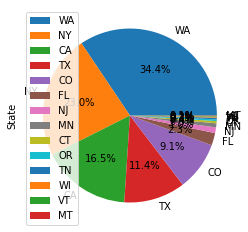

In [21]:
# pandas pie chart with percenatges
df_combined["State"].value_counts().plot(kind="pie",autopct='%1.1f%%',legend=True)
# df_combined["State"].value_counts().plot(kind="pie")

<Axes: >

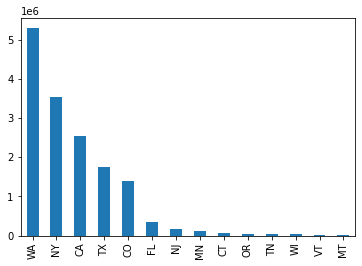

In [22]:
# pandas bar chart
df_combined["State"].value_counts().plot(kind="bar")

 # Vehicle make